In [1]:
import rebound
import sys
#change the next line to reflect where you have downloaded the source code
sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
import sbdynt as sbd

# *Example of some built-in scripts for plotting and reading simulation archive files*

We first have to have an example integration to work with. This is a chaotic TNO that is also resonant, which can be used to demonstrate basic and resonance-based plotting scripts

In [2]:
small_body = 'K00F53X'
data_directory = 'outputs-from-example-notebooks'
n_clones = 10
tmax = 5e6
tout = 1e3

In [ ]:
iflag, epoch, sim = sbd.initialize_simulation(planets=['outer'], des=small_body, clones=n_clones)

if(iflag):
    #run the simulation, deleting any pre-existing archive file for this object
    rflag, sim = sbd.run_simulation(sim, des=small_body, datadir=data_directory, tmax=tmax, tout=tout,deletefile=True)


**Basic a-e-i time series plots**

All the plotting scripts can take pre-populated orbital element and time arrays, or they can read them from simulation archive files.

The first example here is an a-e-i plot using sbd.**plot_aei**, where we will let the plotting script read the data from the default simulation archive file name generated from sbd.**run_simulation** above. If you used your own naming scheme, just pass that file name with the **archivefile** parameter.

This minimal call to sbd.**plot_aei** will return a flag and the matplotlib figure. The default is to plot all of the clones for the entire timespan in the simulation archivefile.

In [8]:
des=None
a = None
if(type(des) == 'NoneType' and type(a) == 'NoneType'):
    print("yes")
des==None

True

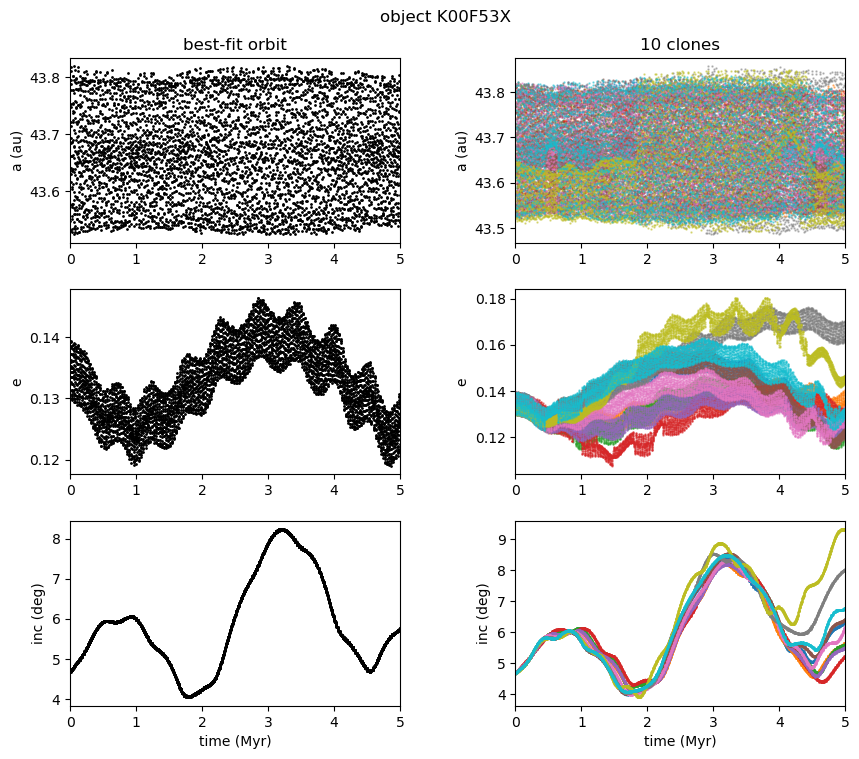

In [3]:
flag, aei_fig = sbd.plot_aei(des=small_body, datadir=data_directory)

If you want to plot just the best-fit orbit (or some number of clones that is smaller than all of them), use the **clones** parameter. You can also save the figure to a file using **figfile**. 

In [ ]:
flag, aei_bf_fig = sbd.plot_aei(des=small_body, datadir=data_directory, clones=0, figfile='plot_aei-example.pdf')

**Example of reading the orbital elements from the simulation archive file and passing those to the plotting script**

If you want direct access to the orbital elements, you can read them using sbd.**read_sa_for_sbody**, and you can pass those orbital elements to the plotting script as an alternative to the script reading them from the archivefile


In [ ]:
#reading all the clones (the best fit will be indexed 0, then clones)
flag, a, e, inc, node, aperi, ma, t  = sbd.read_sa_for_sbody(des=small_body, datadir = data_directory)
if(flag):
    flag, aei_fig = sbd.plot_aei(a=a, e=e, inc=inc,t=t)
    #note that if you want the object name in the plot title, pass des=small_body 

**Plots for resonant objects**

This object is in Neptune's 7:4 mean motion resonance, so we can generate a plot that also include the resonant angle using sbd.**plot_resonance**. 

If you want the plotting function to read from the archive file and calculate the resonant angle, you must specify the planet the resonance is with as well as (at a minimum) the integers **p** and **q** for the resonant angle 

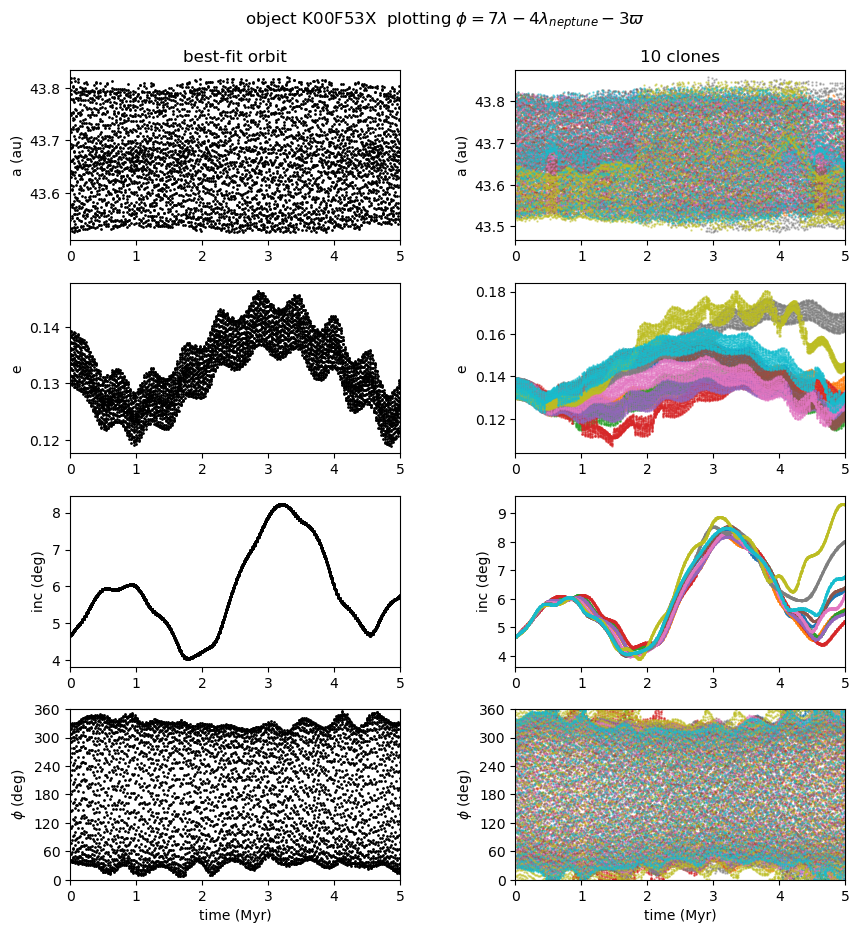

In [3]:
#default plotting function call
flag, res_fig = sbd.plot_resonance(des = small_body, planet='neptune',
                                   p=7,q=4,
                                   datadir = data_directory)

In [ ]:
#now reading all the clones (the best fit will be indexed 0, then clones)
flag, a, e, inc, node, aperi, ma, phi, t,res_str = sbd.read_sa_for_resonance(
                            des=small_body, datadir= data_directory,
                            planet='neptune',
                            p=7,q=4)
print(res_str)


In [ ]:
a.shape

In [ ]:
#Advanced options on that plotting call:
#you can make the point sizes bigger or smaller and the clones more or less transparent
#bfps controls the best-fit
#cps controls the clones
#calpha controls the clone transparency
flag, fig2 = sbd.plot_resonance(sbody=sbody,
                          res_string=res_str,
                          a=a,e=e,inc=inc,phi=phi,t=t,
                          nclones=nclones,figfile=None,bfps=2.,cps=0.2,calpha=0.2)

In [ ]:
#More options:
#set the x-axis range:
tmin=0.
tmax=1e6
flag, fig3 = sbd.plot_resonance(sbody=sbody,
                          res_string=res_str,
                          a=a,e=e,inc=inc,phi=phi,t=t,
                          nclones=nclones,figfile=None,bfps=2.,cps=0.4,calpha=0.4,
                          tmin=tmin,tmax=tmax)

In [ ]:
#zoom in even further where the clones start diverging
tmin=0.5e6
tmax=0.8e6
flag, fig4 = sbd.plot_resonance(sbody=sbody,
                          res_string=res_str,
                          a=a,e=e,inc=inc,phi=phi,t=t,
                          nclones=nclones,figfile=None,bfps=2.,cps=1,calpha=0.9,
                          tmin=tmin,tmax=tmax)

In [ ]:
#Maybe you want to look at an object in a rotating frame with the planet it is resonant with
#Let's take a look at that for a simple 3:2 resonant object:

small_body = '129746'
n_clones = 5
tmax = 0.5e6
tmin=0.
tout = 1e2
flag, epoch, sim = sbd.initialize_simulation(planets=['outer'],des=small_body, clones=n_clones)
flag, sim = sbd.run_simulation(sim, des=small_body, tmax=tmax, tout=tout, datadir=data_directory, deletefile=True)

In [ ]:
#you can calculate the coordinates in the rotating frame and make the plot all in one command

flag, rf_fig = sbd.calc_and_plot_rotating_frame(des=small_body, planet = 'neptune',
                                                datadir=data_directory,
                                                figfile='rotating-frame-example.png')